<a href="https://colab.research.google.com/github/MarkLimmage/AustralianSharePrices/blob/main/nlp_mark_limmage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import json
import csv
from io import StringIO
from bs4 import BeautifulSoup
import requests
import pandas as pd
from tqdm.notebook import tqdm

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dateutil.parser as dp
import time
import math

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
motley_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_8.csv')



In [ ]:
motley_9

,Unnamed: 0,Unnamed: 0.1,company,article_url,category,pub_time,title,time,key_points,body,pc
0,0,0,360,https://www.fool.com.au/2022/08/17/down-40-thi...,Technology Shares,NaN,"Down 40% this year, should you pounce on this ...",1.660695e+09,NaN,The Life360 Inc (ASX: 360) share price swung l...,-13.90
1,1,1,360,https://www.fool.com.au/2022/08/16/here-are-th...,Share Market News,NaN,Here are the top 10 ASX 200 shares today,1.660632e+09,NaN,S&P/ASX 200 Index (ASX: XJO) shares pushed thr...,-11.72
2,2,2,360,https://www.fool.com.au/2022/08/16/why-bhp-lif...,Share Gainers,NaN,"Why BHP, Life360, Tassal, and Temple & Webster...",1.660627e+09,NaN,"In afternoon trade, the S&P/ASX 200 Index (ASX...",-11.72
3,3,3,360,https://www.fool.com.au/2022/08/16/life360-sha...,Earnings Results,NaN,Life360 share price rises as revenue more than...,1.660610e+09,The Life360 share price is climbing 3% higher ...,The Life360 Inc (ASX: 360) share price is boun...,-11.72
4,4,4,360,https://www.fool.com.au/2022/08/12/2-exciting-...,Growth Shares,NaN,2 exciting ASX tech shares to buy now accordin...,1.660293e+09,NaN,"If you’re searching for growth shares to buy, ...",4.26
...,...,...,...,...,...,...,...,...,...,...,...
3745,3745,3745,APT,https://www.fool.com.au/2021/11/17/5-things-to...,Share Market News,NaN,NaN,NaN,NaN,NaN,NaN
3746,3746,3746,APT,https://www.fool.com.au/2021/11/16/when-will-a...,BNPL shares,NaN,NaN,NaN,NaN,NaN,NaN
3747,3747,3747,APT,https://www.fool.com.au/2021/11/15/this-young-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3748,3748,3748,APT,https://www.fool.com.au/2021/11/15/a-bumper-ch...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
lm_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A3/Loughran-McDonald_MasterDictionary_1993-2021.csv')

In [ ]:
lm_csv

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
0,AARDVARK,1,354,1.550080e-08,1.422600e-08,3.815486e-06,99,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.313627e-10,8.653817e-12,9.241714e-09,1,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,3.940882e-10,1.169679e-10,5.290465e-08,7,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,29,1.269840e-09,6.654735e-10,1.595100e-07,28,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8570,3.752595e-07,3.809464e-07,3.529356e-05,1108,0,0,0,0,0,0,0,3,12of12inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86526,ZYGOTE,86529,50,2.189379e-09,8.729336e-10,1.886011e-07,35,0,0,0,0,0,0,0,2,12of12inf
86527,ZYGOTES,86530,1,4.378757e-11,1.809516e-11,1.932446e-08,1,0,0,0,0,0,0,0,2,12of12inf
86528,ZYGOTIC,86531,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf
86529,ZYMURGIES,86532,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf


In [ ]:
moods = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']
sentiment = dict()
for mood in moods:
  sentiment[mood] = []

mood_count = dict()
for mood in moods:
  mood_count[mood] = 0

mood_count  

{'Negative': 0,
 'Positive': 0,
 'Uncertainty': 0,
 'Litigious': 0,
 'Strong_Modal': 0,
 'Weak_Modal': 0,
 'Constraining': 0}

In [ ]:
#iterate through the master dictionary, building lists of sentiment words
moods = ['Positive', 'Negative', 'Uncertainty', 
         'Litigious', 'Strong_Modal', 'Weak_Modal', 'Constraining']
sentiment = dict()
for mood in moods:
  sentiment[mood] = []
  
for index, row in tqdm(lm_csv.iterrows(), total=len(lm_csv)):
  for mood in moods:
    if( row[mood] != 0 ):
      sentiment[mood].append(row['Word'])




  0%|          | 0/86531 [00:00<?, ?it/s]

In [ ]:
negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
  if word.lower() in negate:
      return True
  else:
      return False

In [ ]:
def read_mood(sentence):
  try:
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', 
                             sentence.lower())
    
    word_count = len(input_words)
    mood_count = dict()
    for mood in moods:
      mood_count[mood] = 0

    for i in range(0, word_count):
      # Deal with all the moods except positive
      for mood in moods[1:6]:
        if input_words[i].upper() in sentiment[mood]:
            mood_count[mood] += 1
      # Positive moods but counting negation
      if input_words[i].upper() in sentiment['Positive']:
          if i >= 3:
              if negated(input_words[i - 1].upper()) or 
              negated(input_words[i - 2].upper()) or 
              negated(input_words[i - 3].upper()):
                  mood_count['Negative'] += 1                
              else:
                  mood_count['Positive'] += 1                
          elif i == 2:
              if negated(input_words[i - 1].upper()) or 
              negated(input_words[i - 2].upper()):
                  mood_count['Negative'] += 1                
              else:
                  mood_count['Positive'] += 1                
          elif i == 1:
              if negated(input_words[i - 1].upper()):
                  mood_count['Negative'] += 1                
              else:
                  mood_count['Positive'] += 1                
          elif i == 0:
              mood_count['Positive'] += 1        
    return mood_count
  except:
    return



In [ ]:
read_mood('Complaint Best The quick brown fox fox fox jummped over the lazy red dog.')

['complaint', 'best', 'the', 'quick', 'brown', 'fox', 'fox', 'fox', 'jummped', 'over', 'the', 'lazy', 'red', 'dog']
{'Positive': 1, 'Negative': 2, 'Uncertainty': 0, 'Litigious': 0, 'Strong_Modal': 1, 'Weak_Modal': 0, 'Constraining': 0}


In [ ]:
for mood in moods:
  body_mood = 'body_'+ mood
  title_mood = 'title' + mood
  key_mood = 'key_'+ mood
  motley_9[key_mood] = 0
  motley_9[body_mood] = 0
  motley_9[title_mood] = 0


In [ ]:
for mood in moods:
  key_mood = 'key_'+ mood
  motley_9[key_mood] = 0


In [ ]:
for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  key_moods = read_mood(row['key_points'])
  try:
    for mood, count in key_moods.items():
      key_mood = 'key_'+ mood
      motley_9.loc[index, key_mood] = count
  except:
    continue

In [ ]:
for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  title_moods = read_mood(row['title'])
  try:
    for mood, count in title_moods.items():
      title_mood = 'title_'+ mood
      motley_9.loc[index, title_mood] = count
  except:
    continue

  0%|          | 0/42648 [00:00<?, ?it/s]

In [ ]:
for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  try:
    sentences = sent_tokenize( row['key_points'] )
    n_sentences = len(sentences)
    for sentence in sentences:
      sentence_moods = read_mood(sentence)
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] += count
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] = count/n_sentences
  except:
    continue

  0%|          | 0/42648 [00:00<?, ?it/s]

In [ ]:
motley_9.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'company', 'article_url', 'category',
       'pub_time', 'title', 'time', 'key_points', 'body', 'pc',
       'body_Positive', 'titlePositive', 'body_Negative', 'titleNegative',
       'body_Uncertainty', 'titleUncertainty', 'body_Litigious',
       'titleLitigious', 'body_Strong_Modal', 'titleStrong_Modal',
       'body_Weak_Modal', 'titleWeak_Modal', 'body_Constraining',
       'titleConstraining', 'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'],
      dtype='object')

In [ ]:
motley_10 = motley_9[['pc', 'category', 
       'key_points', 'body_Positive', 'titlePositive', 'body_Negative', 'titleNegative',
       'body_Uncertainty', 'titleUncertainty', 'body_Litigious',
       'titleLitigious', 'body_Strong_Modal', 'titleStrong_Modal',
       'body_Weak_Modal', 'titleWeak_Modal', 'body_Constraining',
       'titleConstraining', 'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]]

motley_10['sum'] = motley_10[['key_points', 'body_Positive', 'titlePositive', 'body_Negative', 'titleNegative',
       'body_Uncertainty', 'titleUncertainty', 'body_Litigious',
       'titleLitigious', 'body_Strong_Modal', 'titleStrong_Modal',
       'body_Weak_Modal', 'titleWeak_Modal', 'body_Constraining',
       'titleConstraining', 'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]].sum(axis=1)

print('Before dropping:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['sum'] == 0 ].index)

print('Afetr dropping for missing X:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['pc'] == 0 ].index)

print('Afetr dropping for missing y:', len(motley_10))

Before dropping: 42648
Afetr dropping for missing X: 17980
Afetr dropping for missing y: 17579


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# All together

In [ ]:
motley_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_9.csv')

for mood in moods:
  body_mood = 'body_'+ mood
  title_mood = 'title' + mood
  key_mood = 'key_'+ mood
  motley_9[key_mood] = 0
  motley_9[body_mood] = 0
  motley_9[title_mood] = 0

for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  key_moods = read_mood(row['key_points'])
  try:
    for mood, count in key_moods.items():
      key_mood = 'key_'+ mood
      motley_9.loc[index, key_mood] = count
  except:
    continue

for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  title_moods = read_mood(row['title'])
  try:
    for mood, count in title_moods.items():
      title_mood = 'title_'+ mood
      motley_9.loc[index, title_mood] = count
  except:
    continue

for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  try:
    sentences = sent_tokenize( row['body'] )
    n_sentences = len(sentences)
    for sentence in sentences:
      sentence_moods = read_mood(sentence)
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] += count
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] = count/n_sentences
  except:
    continue

motley_10 = motley_9[['pc', 'category', 
       'body_Positive', 'body_Negative', 
       'body_Uncertainty',  'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal',  'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]]

motley_10['sum'] = motley_10[[ 'body_Positive', 'body_Negative', 
       'body_Uncertainty',  'body_Litigious',
       'body_Strong_Modal', 
       'body_Weak_Modal',  'body_Constraining',
       'title_Positive', 'title_Negative',
       'title_Uncertainty', 'title_Litigious', 'title_Strong_Modal',
       'title_Weak_Modal', 'title_Constraining', 'key_Positive',
       'key_Negative', 'key_Uncertainty', 'key_Litigious', 'key_Strong_Modal',
       'key_Weak_Modal', 'key_Constraining'  ]].sum(axis=1)

print('Before dropping:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['sum'] == 0 ].index)

print('Afetr dropping for missing X:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['pc'] == 0 ].index)

print('Afetr dropping for missing y:', len(motley_10))

motley_9.to_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_11.csv')
motley_10.to_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_10.csv')

  0%|          | 0/42648 [00:00<?, ?it/s]

  0%|          | 0/42648 [00:00<?, ?it/s]

  0%|          | 0/42648 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Before dropping: 42648
Afetr dropping for missing X: 13855
Afetr dropping for missing y: 13497


In [ ]:
motley_9.to_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_12.csv')

In [ ]:
for index, row in tqdm(motley_9.iterrows(), total=len(motley_9)):
  try:
    sentences = sent_tokenize( row['body'] )
    n_sentences = len(sentences)
    for sentence in sentences:
      sentence_moods = read_mood(sentence)
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] += count
      for mood, count in sentence_moods.items():
        body_mood = 'body_'+ mood
        motley_9.loc[index, body_mood] = count/n_sentences
  except:
    continue

  0%|          | 0/42648 [00:00<?, ?it/s]

In [ ]:
print('Before dropping:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['sum'] == 0 ].index)

print('After dropping for missing X:', len(motley_10))

motley_10 = motley_10.drop(motley_10[motley_10['pc'] == 0 ].index)

print('After dropping for missing y:', len(motley_10))

Before dropping: 13497
After dropping for missing X: 13497
After dropping for missing y: 13497


In [ ]:
motley_10.columns

Index(['pc', 'category', 'key_points', 'body_Positive', 'titlePositive',
       'body_Negative', 'titleNegative', 'body_Uncertainty',
       'titleUncertainty', 'body_Litigious', 'titleLitigious',
       'body_Strong_Modal', 'titleStrong_Modal', 'body_Weak_Modal',
       'titleWeak_Modal', 'body_Constraining', 'titleConstraining',
       'title_Positive', 'title_Negative', 'title_Uncertainty',
       'title_Litigious', 'title_Strong_Modal', 'title_Weak_Modal',
       'title_Constraining', 'key_Positive', 'key_Negative', 'key_Uncertainty',
       'key_Litigious', 'key_Strong_Modal', 'key_Weak_Modal',
       'key_Constraining', 'sum'],
      dtype='object')

In [ ]:
motley_9 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MA5851/assessments/A2/motley_9.csv')

(-20.0, 20.0)

<Figure size 432x288 with 0 Axes>

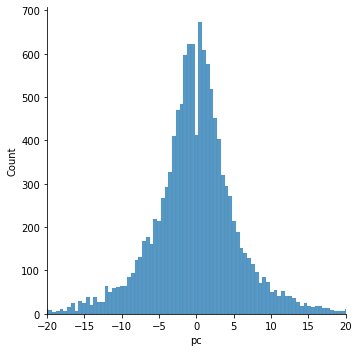

In [ ]:
# Distribution of target variables
plt.clf()
sns.displot(motley_10, x="pc")
plt.xlim(-20, 20)


In [ ]:
# Distribution of features

features = motley_10[['body_Positive', 
       'body_Negative', 'title_Positive', 'title_Negative',  'key_Positive', 'key_Negative', ]]

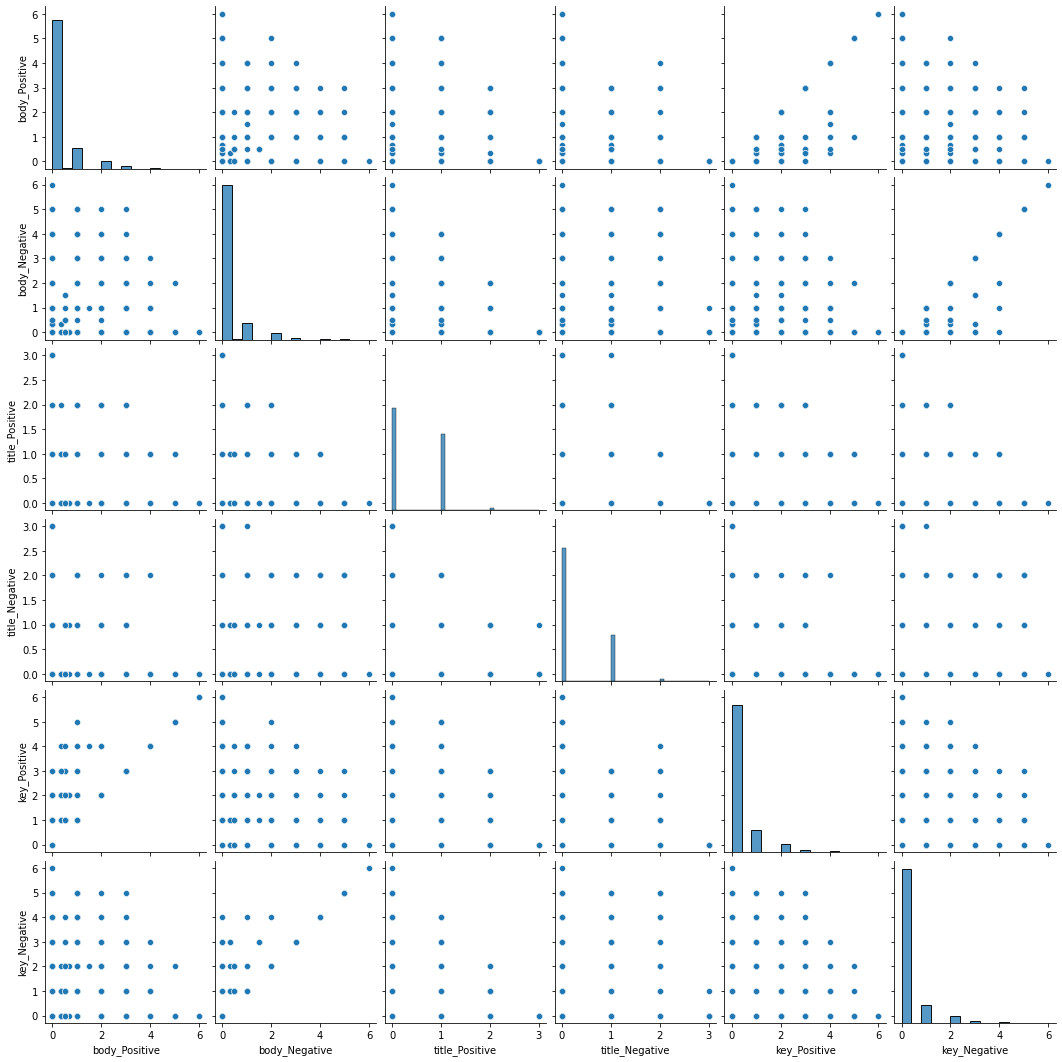

In [ ]:
sns.pairplot(features)

In [ ]:
len(sent_tokenize(motley_9['body'][0]))

31